<a href="https://colab.research.google.com/github/Eswar2607/node3-weather-website/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

In [3]:
df = pd.read_csv('Real estate.csv' )
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(5, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      5 non-null      int64  
 1   X1 transaction date                     5 non-null      float64
 2   X2 house age                            5 non-null      float64
 3   X3 distance to the nearest MRT station  5 non-null      float64
 4   X4 number of convenience stores         5 non-null      int64  
 5   X5 latitude                             5 non-null      float64
 6   X6 longitude                            5 non-null      float64
 7   Y house price of unit area              5 non-null      float64
dtypes: float64(6), int64(2)
memory usage: 448.0 bytes


In [6]:

# Finding out the missing value
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
new=df['X1 transaction date'].astype(str).str.split(".",n=1,expand=True)

In [9]:
df['transaction_year']=new[0]

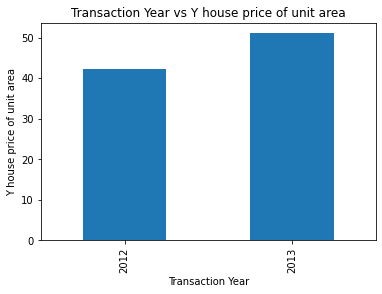

In [10]:

data=df.copy()
data.groupby('transaction_year')['Y house price of unit area'].median().plot.bar()
plt.title('Transaction Year vs Y house price of unit area')
plt.xlabel('Transaction Year')
plt.ylabel('Y house price of unit area')
plt.show()

In [11]:
numeric_feature= list(df.select_dtypes(include=['int64','float64']).keys())
numeric_feature

['No',
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude',
 'Y house price of unit area']

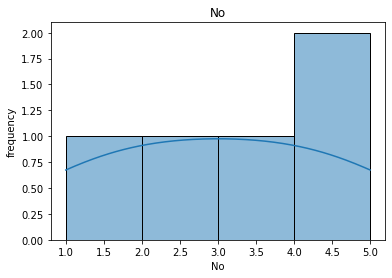

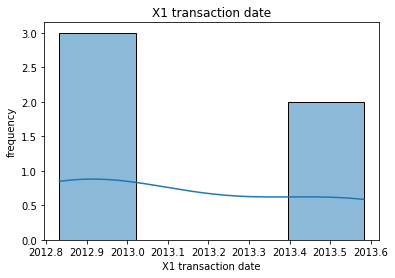

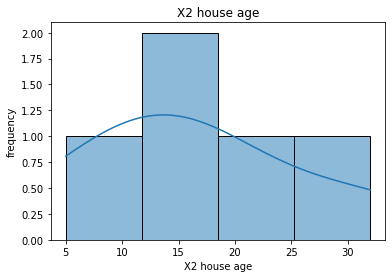

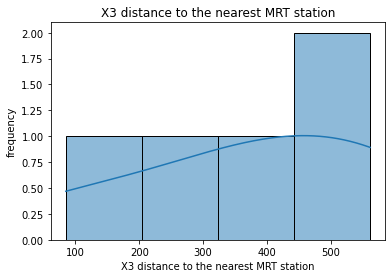

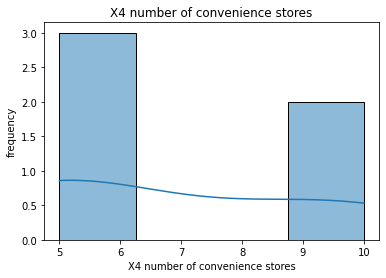

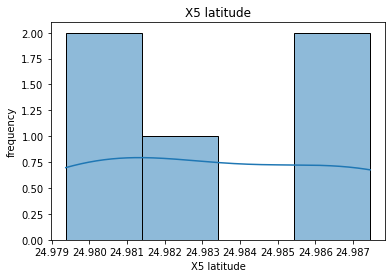

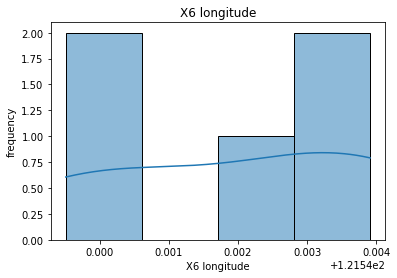

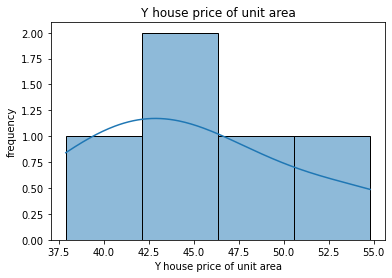

In [12]:

for feature in numeric_feature:
    sns.histplot(data=df,x=feature,kde=True,palette='pastel')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

In [13]:

df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
transaction_year                           object
dtype: object

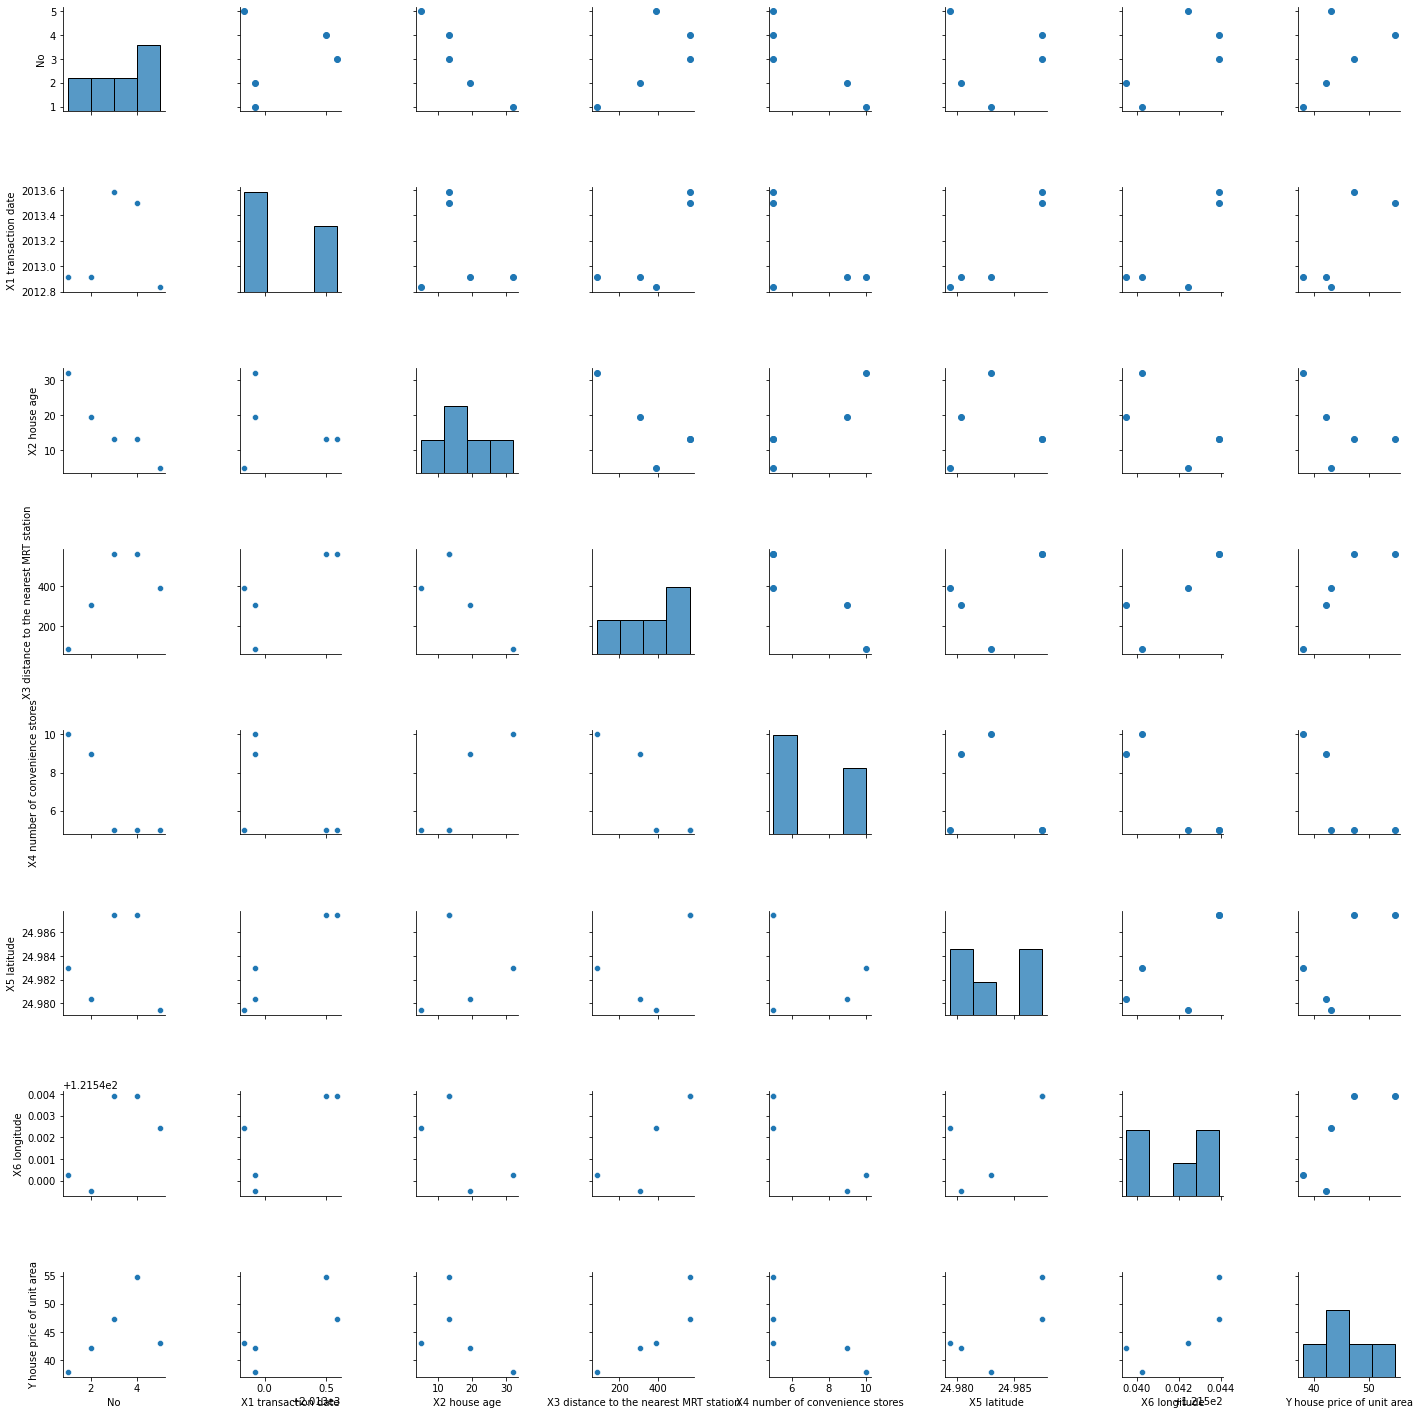

In [14]:

g = sns.pairplot(df)
g.map_upper(plt.scatter)

In [15]:
df.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,0.182155,-0.949584,0.687769,-0.889001,-0.004128,0.680552,0.569384
X1 transaction date,0.182155,1.000000,-0.219518,0.783672,-0.584474,0.954469,0.793564,0.797011
X2 house age,-0.949584,-0.219518,1.000000,-0.761185,0.885648,0.029941,-0.634740,-0.528556
X3 distance to the nearest MRT station,0.687769,0.783672,-0.761185,1.000000,-0.896901,0.584063,0.858445,0.880508
X4 number of convenience stores,-0.889001,-0.584474,0.885648,-0.896901,1.000000,-0.404710,-0.920943,-0.742611
X5 latitude,-0.004128,0.954469,0.029941,0.584063,-0.404710,1.000000,0.702452,0.697997
X6 longitude,0.680552,0.793564,-0.634740,0.858445,-0.920943,0.702452,1.000000,0.796973
Y house price of unit area,0.569384,0.797011,-0.528556,0.880508,-0.742611,0.697997,0.796973,1.000000


In [16]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000
mean,3.000000,2013.150000,16.620000,381.202184,6.80000,24.983522,121.542004,45.06000
std,1.581139,0.360228,10.023822,199.264918,2.48998,0.003830,0.002049,6.38694
min,1.000000,2012.833000,5.000000,84.878820,5.00000,24.979370,121.539510,37.90000
25%,2.000000,2012.917000,13.300000,306.594700,5.00000,24.980340,121.540240,42.20000
50%,3.000000,2012.917000,13.300000,390.568400,5.00000,24.982980,121.542450,43.10000
75%,4.000000,2013.500000,19.500000,561.984500,9.00000,24.987460,121.543910,47.30000
max,5.000000,2013.583000,32.000000,561.984500,10.00000,24.987460,121.543910,54.80000


In [17]:

static=pd.get_dummies(df['transaction_year'],prefix_sep='_',prefix='year')
static

,year_2012,year_2013
0,1,0
1,1,0
2,0,1
3,0,1
4,1,0


In [18]:

# merge the static into main dataframe
df=pd.concat([df,static],axis=1)

In [19]:

# drop the transaction_year column and print top-5 records
df.drop('transaction_year',axis=1,inplace=True)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,year_2012,year_2013
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,1,0
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,1,0
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,0,1
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,0,1
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,1,0


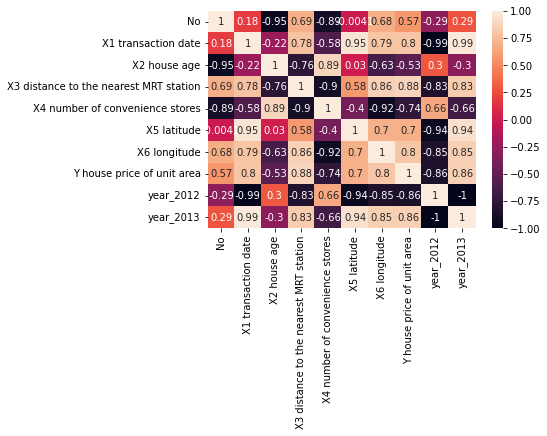

In [20]:

sns.heatmap(df.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


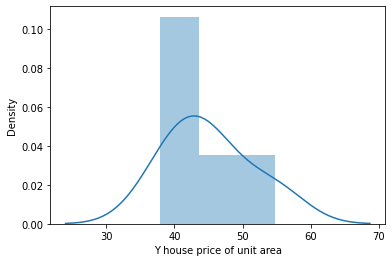

In [21]:
sns.distplot(df['Y house price of unit area'])

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [23]:
X = df.drop('Y house price of unit area',axis=1)
y = df['Y house price of unit area']

In [24]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5,random_state = 101)

In [25]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit (X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
lin_reg.coef_

pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficients'])

,Coefficients
No,3.860014e-04
X1 transaction date,1.125194e-04
X2 house age,-1.196604e-03
X3 distance to the nearest MRT station,4.929042e-02
X4 number of convenience stores,-7.720029e-04
X5 latitude,1.374165e-06
X6 longitude,8.492032e-07
year_2012,-1.930007e-04
year_2013,1.930007e-04


In [27]:

y_pred = lin_reg.predict(X_test)


**Evalutaing the Model**

In [28]:

MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
MAE,5.801631
MSE,37.008971
RMSE,6.083500


In [29]:

test_residuals=y_test - y_pred
test_residuals.head()

0    6.644583
4   -3.260686
2   -7.499623
Name: Y house price of unit area, dtype: float64

Text(0, 0.5, 'Y-Pred')

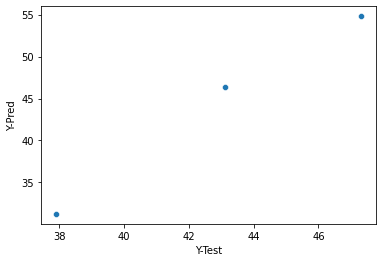

In [30]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


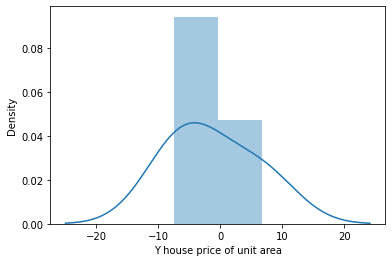

In [31]:
sns.distplot(test_residuals)

In [32]:
df['Y house price of unit area'].mean()

45.059999999999995